#Algorithmic Toolbox – Week 6 – Dyn Programming





##6-1: Maximum Amount of Gold

In [ ]:
#include <bits/stdc++.h>

using namespace std;

int knapsack(int Weight, vector<int> &w){
    int n = w.size() + 1;
    int m = Weight + 1;
    int** matrix = new int* [n];

    for(int i = 0; i < n; i++){
        matrix[i] = new int[m];
    }

    for(int i = 0; i < n; i++){
        matrix[i][0] = 0;
    }

    for(int j = 0; j < m; j++){
        matrix[0][j] = 0;
    }

    for(int i = 1; i < n; i++){
        for(int j = 1; j < m; j++){
            if(w[i - 1] <= j){
                matrix[i][j] = max(matrix[i - 1][j], matrix[i - 1][j - w[i - 1]] + w[i - 1]);
            }else{
                matrix[i][j]  = matrix[i - 1][j];
            }
        }
    }

    /*for(int i = 0; i < n; i++){
        for(int j = 0; j < m; j++){
            cout << matrix[i][j] << '\t';
        }
        cout << endl;
    }*/

    return matrix[n - 1][m - 1];

}

int main(){
    int Weight;
    cin >> Weight;
    int n;
    cin >> n;
    vector<int> w(n);
    for(int i = 0; i < n; i++){
        cin >> w[i];
    }
    cout << knapsack(Weight, w) << endl;
    return 0;
}

##4-3: Maximum Value of an Arithmetic Expression

In [ ]:
#include <bits/stdc++.h>

using namespace std;

long long cast(long long left, char op , long long right){
    switch (op){
    case '+':
        return left + right;
    case '-':
        return left - right;
    case '*':
        return left * right;
    default:
        return 0;
    }
}

long long max_value_of_an_arithmetic_expression(vector<int> &d, vector<char> &op){
    int n = d.size();
    pair<long long, long long> matrix[n + 1][n + 1];

    for(int i = 1; i <= n; i++){
        matrix[i][i] = make_pair(d[i - 1], d[i - 1]);
    }

    for(int s = 1; s <= n - 1; s++){
        for(int i = 1; i <= n - s; i++){
            int j = i + s;
            long long min_value = LLONG_MAX;
            long long max_value = LLONG_MIN;
            for(int k = i; k < j; k++){
                long long a = cast(matrix[i][k].second, op[k - 1] , matrix[k + 1][j].second);
                long long b = cast(matrix[i][k].second, op[k - 1] , matrix[k + 1][j].first);
                long long c = cast(matrix[i][k].first, op[k - 1] , matrix[k + 1][j].second);
                long long d = cast(matrix[i][k].first, op[k - 1] , matrix[k + 1][j].first);
                min_value = min(min_value, min(a, min(b, min(c, d))));
                max_value = max(max_value, max(a, max(b, max(c, d))));
            } 
        matrix[i][j] = make_pair(min_value, max_value);
        }
    }

    /*for(int i = 1; i <= n; i++){
        for(int j = 1; j <= n; j++){
            cout << matrix[i][j].first << '\t';
        }
        cout << '\n';
    }*/

    return matrix[1][n].second;
}

int main(){
    string input;
    cin >> input;
    vector<int> d((input.size() / 2) + 1);
    vector<char> op(input.size() / 2);
    for(int i = 0; i < input.size(); i++){
        if(i % 2 == 0){
            d[i/2] = input[i] - 48;
        }else{
            op[(i-1)/2] = input[i];
        }
    }
    cout << max_value_of_an_arithmetic_expression(d, op) << endl;
    return 0;
}

##Juez Virtual Coursera

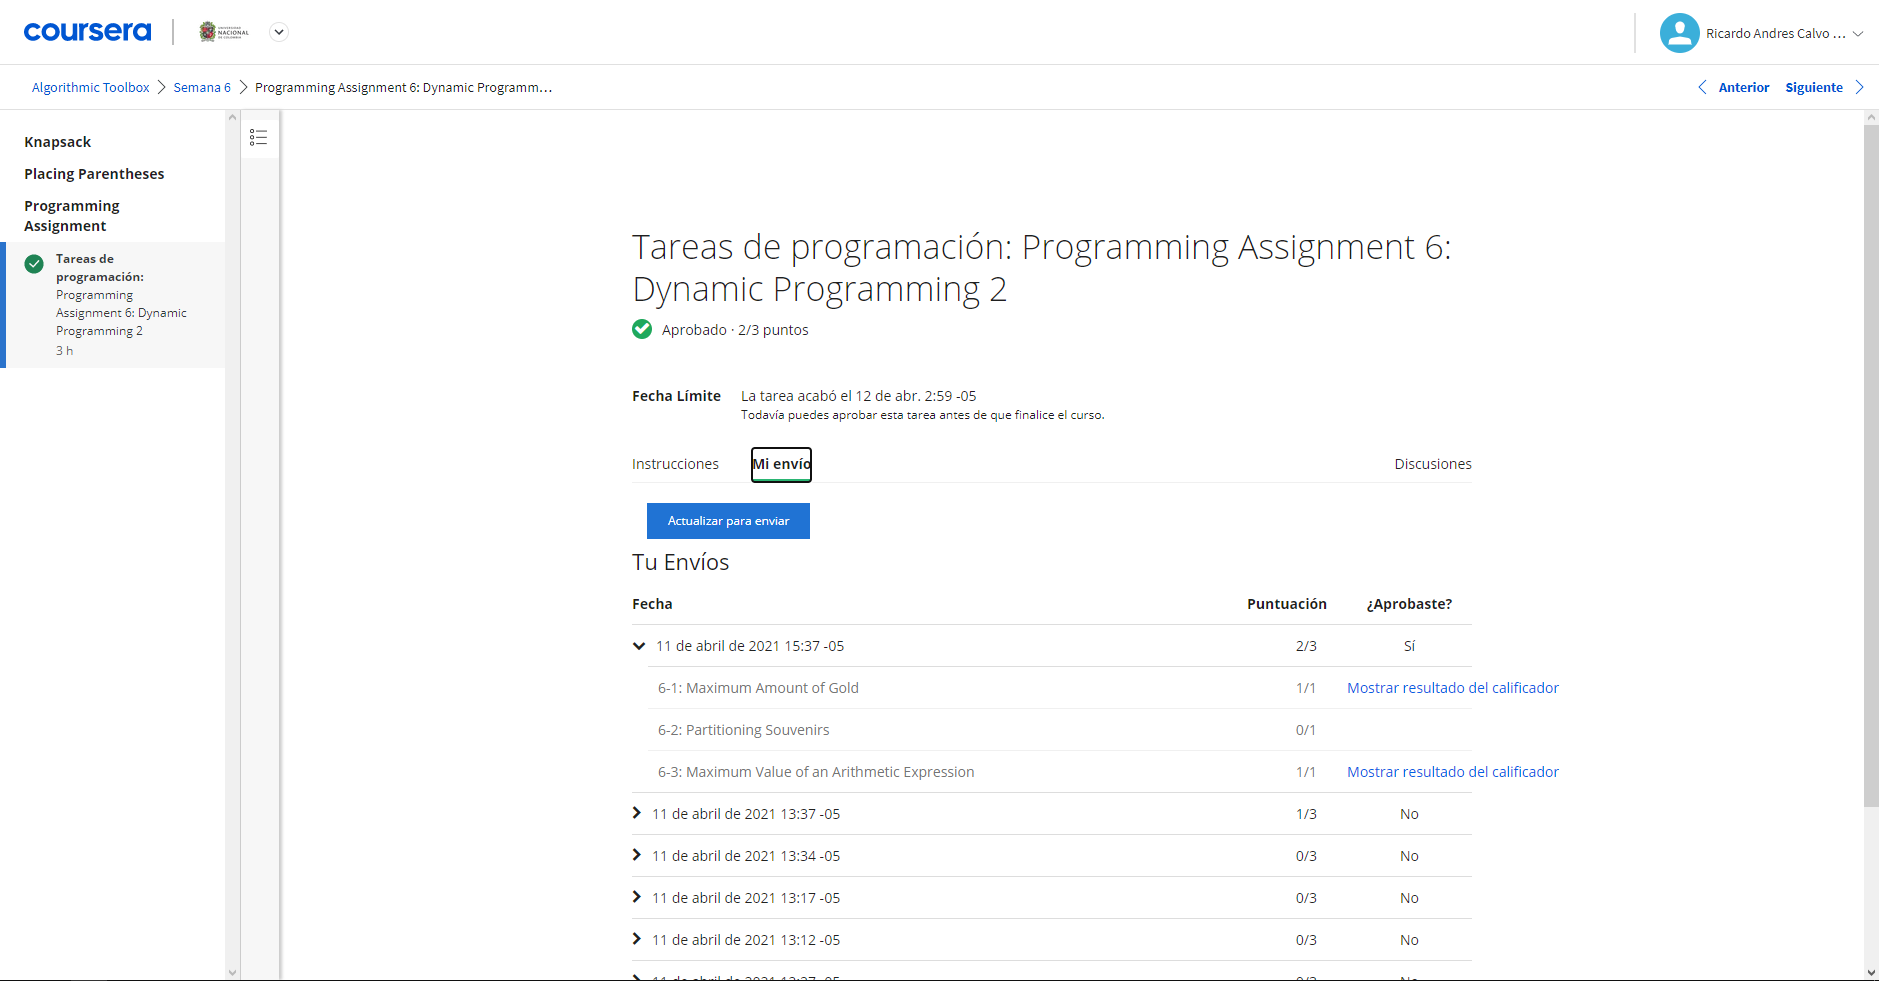

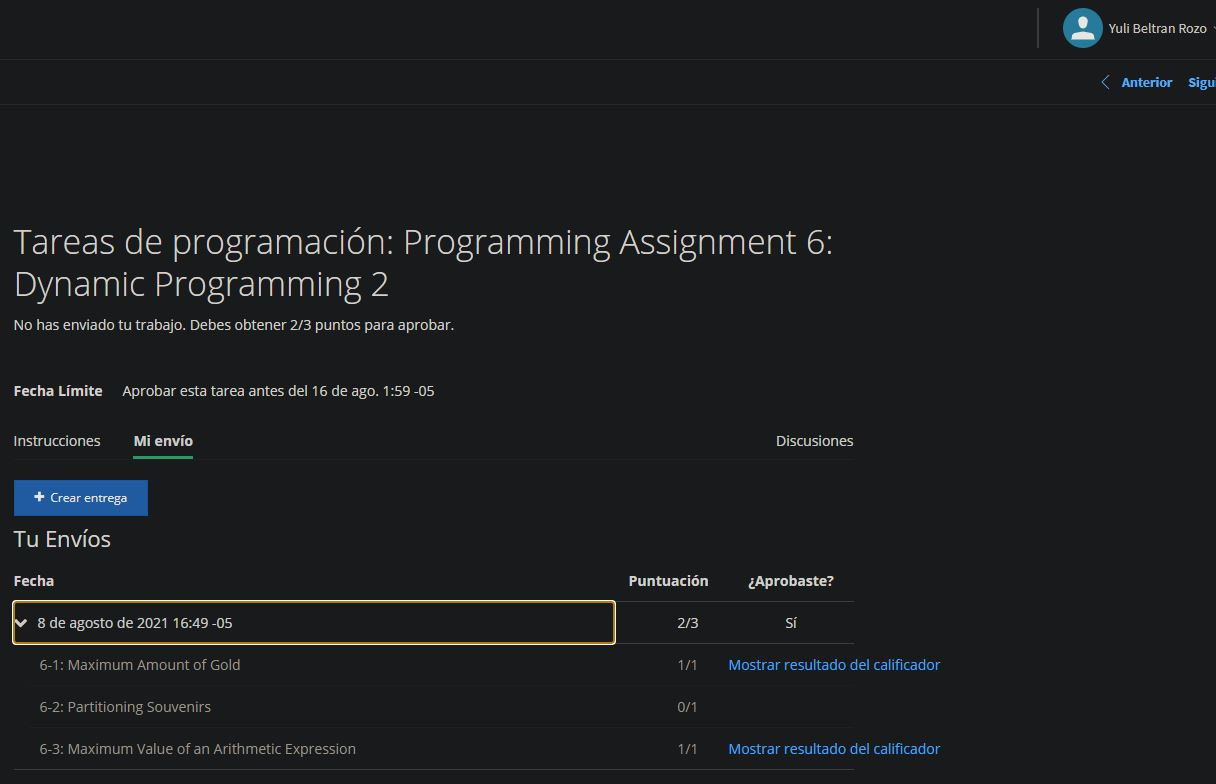